In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("twitter_training.csv")

In [3]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
df.rename(columns = {'Positive':'sentiment','im getting on borderlands and i will murder you all ,':'text'}, inplace = True)

In [5]:
df=df.sample(frac=1)

In [6]:
df.head()

,2401,Borderlands,sentiment,text
72303,11187,TomClancysGhostRecon,Neutral,""" You I can't see the two eyes of the demon, s..."
64532,7855,MaddenNFL,Negative,If @Mathieu_Era doesn’t have an xfactor inside...
53678,2024,CallOfDuty,Positive,"don't like Undertale, i prefer Call of duty, i..."
48477,5922,HomeDepot,Irrelevant,"When the they lose money, they walk back. 8 Se..."
59562,3410,Facebook,Irrelevant,imma say this twice... please stress that you ...


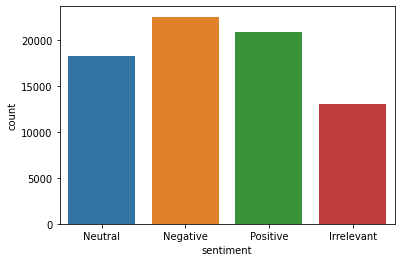

In [7]:
sns.countplot(data=df,x="sentiment")

In [8]:
df=pd.get_dummies(data=df,columns=['sentiment'])

In [9]:
df.head()

,2401,Borderlands,text,sentiment_Irrelevant,sentiment_Negative,sentiment_Neutral,sentiment_Positive
72303,11187,TomClancysGhostRecon,""" You I can't see the two eyes of the demon, s...",0,0,1,0
64532,7855,MaddenNFL,If @Mathieu_Era doesn’t have an xfactor inside...,0,1,0,0
53678,2024,CallOfDuty,"don't like Undertale, i prefer Call of duty, i...",0,0,0,1
48477,5922,HomeDepot,"When the they lose money, they walk back. 8 Se...",1,0,0,0
59562,3410,Facebook,imma say this twice... please stress that you ...,1,0,0,0


In [10]:
X_train=df['text']
Y_train=df.drop(['2401','Borderlands','text'],axis=1)
X_train = np.array([np.array(val) for val in X_train])

In [11]:
df1=pd.read_csv("twitter_validation.csv")

In [12]:
df1.rename(columns = {'Irrelevant':'sentiment','I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣':'text'}, inplace = True)
df1=df1.sample(frac=1)
df1.head()

,3364,Facebook,sentiment,text
929,13033,Xbox(Xseries),Irrelevant,How many of you have bought the season 6 battl...
833,218,Amazon,Positive,A look into progress on the Rivian and Amazon ...
438,1356,Battlefield,Irrelevant,A ban for Battlefield 4 player YourDaddyyyyyy ...
621,6658,Fortnite,Irrelevant,a man on top for that fortnite song
687,12,Amazon,Positive,Amazon has the coolest shit I never thought I ...


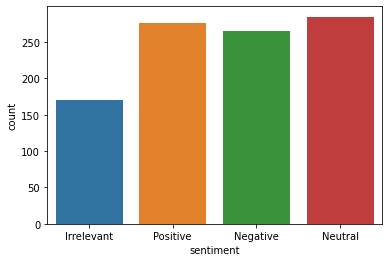

In [14]:
sns.countplot(data=df1,x="sentiment")

In [15]:
df1=pd.get_dummies(data=df1,columns=['sentiment'])
X_test=df1['text']
Y_test=df1.drop(['3364','Facebook','text'],axis=1)
X_test = np.array([np.array(val) for val in X_test])

In [16]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
text_vectorizer = TextVectorization(max_tokens=20000, output_mode="int",output_sequence_length=20)
text_vectorizer.adapt(X_train)

In [17]:
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim=20000,output_dim=128,embeddings_initializer="uniform",input_length=20)

In [18]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(64)(x)
x = layers.Dense(32, activation="tanh")(x) 
outputs = layers.Dense(4, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)

In [19]:
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [20]:
model_history = model.fit(X_train,Y_train,epochs=5,validation_data=(X_test,Y_test))

Epoch 1/5
2334/2334 [==============================] - 26s 10ms/step - loss: 0.8103 - accuracy: 0.6773 - val_loss: 0.2824 - val_accuracy: 0.9029
Epoch 2/5
2334/2334 [==============================] - 23s 10ms/step - loss: 0.3882 - accuracy: 0.8567 - val_loss: 0.1875 - val_accuracy: 0.9560
Epoch 3/5
2334/2334 [==============================] - 22s 9ms/step - loss: 0.2728 - accuracy: 0.8973 - val_loss: 0.1398 - val_accuracy: 0.9600
Epoch 4/5
2334/2334 [==============================] - 23s 10ms/step - loss: 0.2159 - accuracy: 0.9169 - val_loss: 0.1417 - val_accuracy: 0.9610
Epoch 5/5
2334/2334 [==============================] - 21s 9ms/step - loss: 0.1810 - accuracy: 0.9285 - val_loss: 0.1347 - val_accuracy: 0.9620


In [21]:
lst=['sentiment_Irrelevant', 'sentiment_Negative', 'sentiment_Neutral','sentiment_Positive']

In [22]:
test_sample=" it was horrible to see yestersdays match"
pred_prob = model.predict([test_sample])
pred_prob=tf.squeeze(pred_prob)
x=tf.argmax(pred_prob)
print(lst[x])

1/1 [==============================] - 1s 678ms/step
sentiment_Negative
